<a href="https://colab.research.google.com/github/jcjimenezb123/ProgramacionPython/blob/master/Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ecuaciones no lineales

In [38]:
from scipy.optimize import bisect,brentq,ridder,newton,broyden1,anderson

In [17]:
f=lambda x:x**2-2
df=lambda x:2*x
df2=lambda x:2

In [3]:
bisect(f,1,2)

1.4142135623715149

In [7]:
brentq(f,1,2)

1.4142135623731364

In [9]:
ridder(f,1,2)

1.4142135623740955

In [4]:
newton(f,1) #secante

1.414213562373095

In [20]:
newton(f,1,fprime=df) #Newton

1.4142135623730951

In [19]:
newton(f,1,fprime=df,fprime2=df2) #Halley

1.4142135623730951

In [39]:
broyden1(f,1)

array(1.41421242)

In [40]:
anderson(f,1)

array(1.41421443)

###Raices complejas

In [10]:
f=lambda x:x**2+2
df=lambda x:2*x

In [14]:
newton(f,1.0j,df)

1.4142135623730951j

In [21]:
from scipy.optimize import fsolve

In [24]:
f=lambda x:x**2-2
fsolve(f,[1,-1])

array([ 1.41421356, -1.41421356])

##Sistema de ecuaciones no lineales

In [50]:
import numpy as np

def sistema(x):
  x1,x2=x
  return np.array([2*x1-x2-np.exp(-x1),
                   -x1+2*x2-np.exp(-x2)])

In [62]:
r=fsolve(sistema,[-5,-5],xtol=1e-16)
print(r,sistema(r))

[0.56714329 0.56714329] [0. 0.]


In [57]:
r=broyden1(sistema,[-5,-5],f_tol=1e-16)
print(r,sistema(r))

[0.56714329 0.56714329] [0. 0.]


In [61]:
r=anderson(sistema,[-5,-5],f_tol=1e-11)
print(r,sistema(r))

[0.56714329 0.56714329] [-8.75077788e-13 -8.75077788e-13]


##Minimo de una funcion

Se tiene una placa de longitud 50 y ancho 30, se desea construir una caja cortando las cuatro esquinas de longitud $x$, cual es el valor de $x$ para maximizar el volumen de la caja?

$$
v(x)=(30-2x)(50-2x)x
$$

In [84]:
f=lambda x:(30-2*x)*(50-2*x)*x

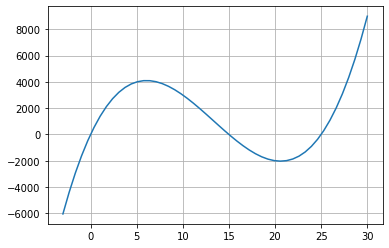

In [87]:
import matplotlib.pyplot as plt

x=np.linspace(-3,30)
y=f(x)

plt.plot(x,y)
plt.grid()

In [64]:
from scipy.optimize import golden

In [75]:
fmin=lambda x:-(30-2*x)*(50-2*x)*x

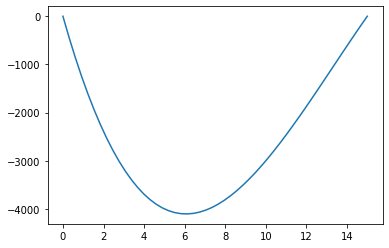

In [76]:
import matplotlib.pyplot as plt

x=np.linspace(0,15)
y=fmin(x)

plt.plot(x,y)

In [83]:
min=golden(fmin)
print(min,fmin(min))

6.068501682390323 -4104.41036767677


In [72]:
from scipy.optimize import minimize_scalar

In [92]:
min = minimize_scalar(fmin,method='Golden')
min

     fun: -4104.41036767677
    nfev: 44
     nit: 37
 success: True
       x: 6.068501682390323

In [90]:
f(min.x)

4104.41036767677

In [91]:
print(f(6),f(min.x),f(6.1))

4104 4104.41036767677 4104.324


##Integrales

La cantidad de masa transportada por una tubería
en un periodo de tiempo se calcula con la ecuación

$$
M=\int_2^8\left( 9+4cos(0.4t)^2\right)\left( 5e^{0.5t}+2e^{0.15t}\right)dt
$$

In [94]:
from scipy.integrate import simps,trapz,quad

In [99]:
f=lambda x:(9+4*np.cos(0.4*x)**2)*(5*np.exp(0.5*x)+2*np.exp(0.15*x))

In [101]:
x=np.linspace(2,8)
simps(f(x),x)

6332.030910205964

In [103]:
trapz(f(x),x)

6334.09249248221

In [104]:
quad(f,2,8)

(6331.9925382759175, 7.029923907748612e-11)

##Ecuaciones diferenciales ordinarias

Calcular la concentración final de A si la constante de velocidad de reacción $k = 2$ y la concentración inicial $C_{A0}= 1.5$ en el tiempo 0, calcular en el tiempo $t_n = 0.6$

$$
A \xrightarrow{k=2} B
$$

$$
\frac{dC_A}{dt}=-2C_A
$$

In [105]:
from scipy.integrate import odeint

In [106]:
def dydx(y,x):
  return -2*y

[0.45179132]


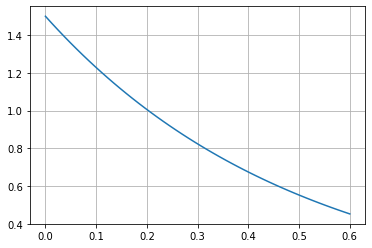

In [112]:
t=np.linspace(0,0.6)
y=odeint(dydx,1.5,t)
print(y[-1])
plt.plot(t,y)
plt.grid()
plt.show()

El meta-Xyleno se produce en un reactor de flujo de pistón a 1500R y 35atm a partir de Mesitileno. Ocurren dos reacciones en éste reactor

$$
Mesitileno (M) + Hidrógeno (H) \xrightarrow{k1} Meta-Xyleno (X) + Metano
$$

$$
Meta-Xyleno (X) + Hidrógeno (H) \xrightarrow{k2} Tolueno (T) + Metano
$$

La segunda reacción no es deseable porque convierte el meta-Xyleno a Tolueno. El siguiente sistema se obtiene del balance

$$
\frac{dC_H}{dt}=-k_1C_H^{0.5}C_M-k_2C_H^{0.5}C_X
$$

$$
\frac{dC_M}{dt}=-k_1C_H^{0.5}C_M
$$

$$
\frac{dC_X}{dt}=k_1C_H^{0.5}C_M -k_2C_H^{0.5}C_X
$$

Donde $k_1$ es la constante de la reacción 1, $k_2$ es la constante de la reacción 2, $C_H$,$C_M$ y
$C_X$ son las concentraciones de hidrógeno, mesitileno y meta-Xyleno en un $t$ específico en el
reactor. Las concentraciones de hidrógeno y mesitileno en la entrada del reactor son $0.021$ y
$0.0105$ $lbmol/ft^3$ y $k_1 = 55.2 ft^3/lbmol 0.5/hr$ $k_2 = 30.2 ft^3/lbmol 0.5/hr$.

Graficar la concentración de hidrógeno, mesitileno, meta-Xyleno como una función de $t$ de 0 a 0.5 hr.

In [113]:
def f(C,t):
  k1 =55.2
  k2 =30.2
  #C [0] concentracion de Hidrogeno
  #C [1] concentracion de Mesitileno
  #C [2] concentracion de Meta - Xylen
  dch =-k1*C s[0]**0.5* C[1] - k2*C [0]**0.5* C [2] # Hidrogeno
  dcm =-k1*C [0]**0.5* C [1] # Mesitileno
  dcx =k1*C [0]**0.5* C[1] - k2*C [0]**0.5* C [2] #Meta - Xylen
  return [dch ,dcm , dcx ]

In [115]:
x0 =0
x1 =0.5
y0 =[0.021 ,0.0105 ,0.]
tiempo =np. linspace (x0 ,x1)
sol = odeint (f,y0 , tiempo )
sol

array([[0.021     , 0.0105    , 0.        ],
       [0.02016696, 0.00968495, 0.00079705],
       [0.01937978, 0.00894753, 0.00148472],
       [0.01863538, 0.00827906, 0.00207726],
       [0.01793091, 0.00767198, 0.00258694],
       [0.01726372, 0.00711968, 0.00302437],
       [0.01663138, 0.00661634, 0.00339871],
       [0.01603163, 0.00615685, 0.00371792],
       [0.01546238, 0.00573673, 0.00398891],
       [0.01492169, 0.005352  , 0.00421768],
       [0.01440778, 0.00499915, 0.00440949],
       [0.01391897, 0.00467504, 0.00456888],
       [0.01345372, 0.00437693, 0.00469985],
       [0.01301061, 0.00410235, 0.0048059 ],
       [0.0125883 , 0.0038491 , 0.00489009],
       [0.01218555, 0.00361523, 0.00495509],
       [0.01180123, 0.00339898, 0.00500327],
       [0.01143426, 0.00319877, 0.00503672],
       [0.01108364, 0.0030132 , 0.00505724],
       [0.01074845, 0.002841  , 0.00506644],
       [0.01042782, 0.00268103, 0.00506576],
       [0.01012095, 0.00253226, 0.00505643],
       [0.

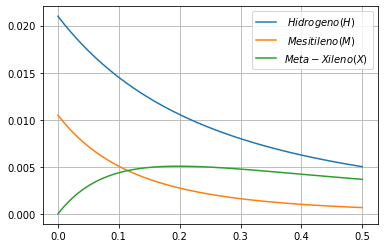

In [116]:
plt.plot ( tiempo , sol [: ,0] , label = ' $Hidrogeno (H)$ ')
plt.plot ( tiempo , sol [: ,1] , label = ' $Mesitileno (M)$ ')
plt.plot ( tiempo , sol [: ,2] , label = '$Meta - Xileno (X)$ ')
plt.legend ()
plt.grid ()
plt.show ()